In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [126]:
df = pd.read_csv('data.csv')

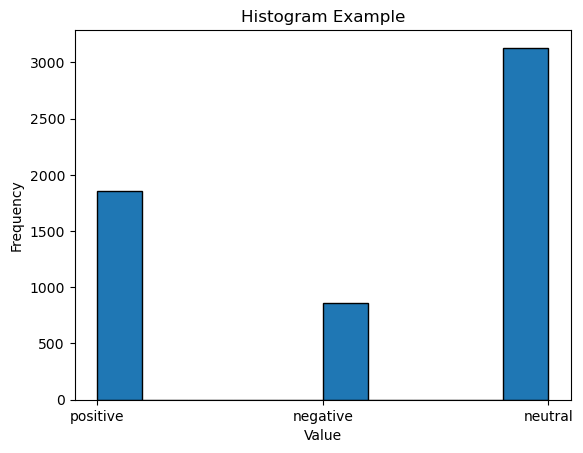

In [128]:
plt.hist(df['Sentiment'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

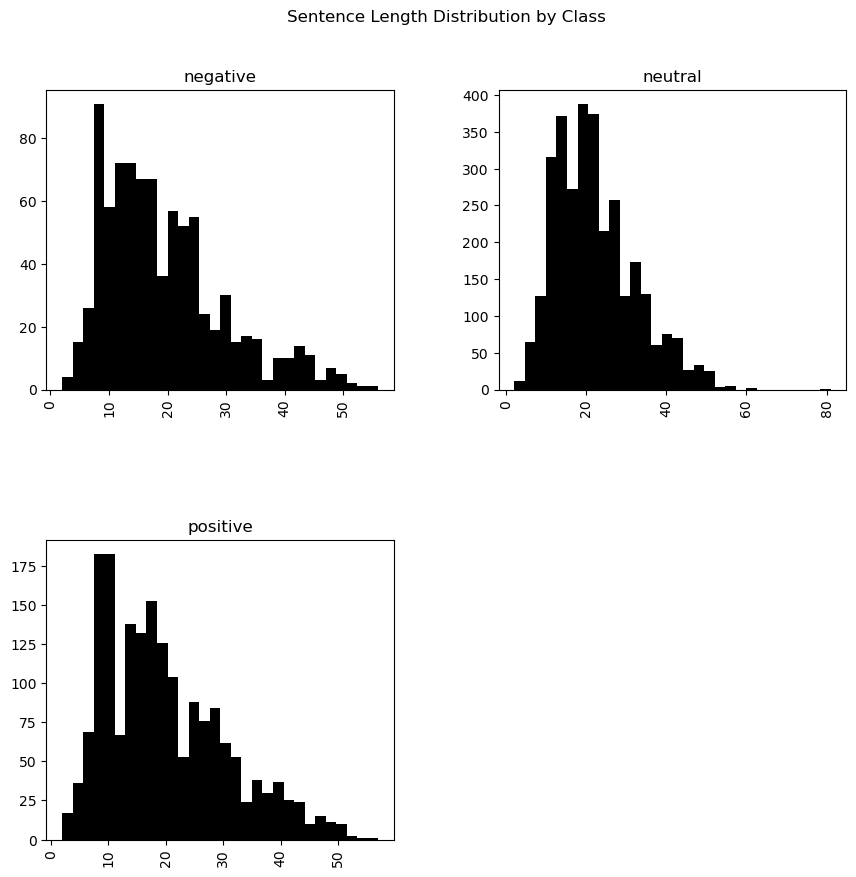

In [68]:
df['Sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
df['Sentence_length'].hist(by=df['Sentiment'], bins=30, figsize=(10, 10),color='black')
plt.suptitle('Sentence Length Distribution by Class')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


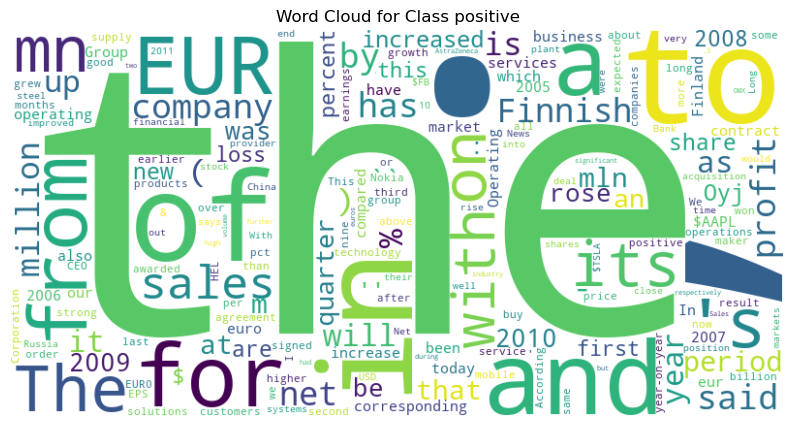

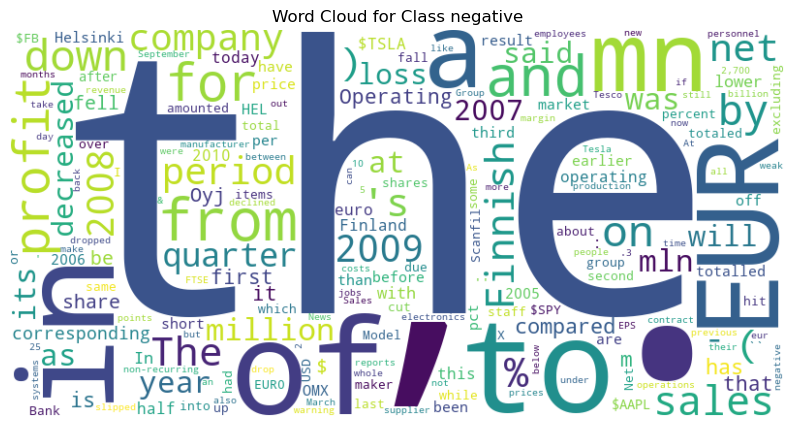

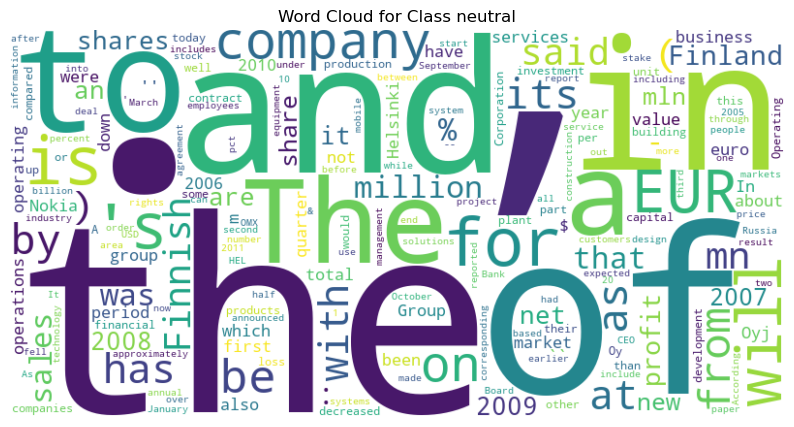

In [69]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')


We can clearly see here, that the stopwords are the most frequent words in each class. Therefore we can remove them.

# Data Preprocessing

In [70]:
df.dropna(inplace=True) #Drop rows that contain null values just in case

In [71]:
df['Sentiment'] = df['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})

In [72]:
df

,Sentence,Sentiment,Sentence_length
0,The GeoSolutions technology will leverage Bene...,1,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,11
2,"For the last quarter of 2010 , Componenta 's n...",1,39
3,According to the Finnish-Russian Chamber of Co...,0,20
4,The Swedish buyout firm has sold its remaining...,0,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,-1,17
5838,Nordic Walking was first used as a summer trai...,0,14
5839,"According shipping company Viking Line , the E...",0,16
5840,"In the building and home improvement trade , s...",0,18


# Balancing the dataset

In order to balance the dataset, we will add more instances from another dataset called "Forex News Annotated Dataset for Sentiment Analysis". You can find it here at https://zenodo.org/records/7976208

In [129]:
df2 = pd.read_csv('sentiment_annotated_with_texts.csv')

In [131]:
df2 = df2[['text','true_sentiment']]

In [135]:
df2.rename(columns={'text': 'Sentence', 'true_sentiment': 'Sentiment'}, inplace=True)

C:\Users\yarin\AppData\Local\Temp\ipykernel_17196\1004955601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'text': 'Sentence', 'true_sentiment': 'Sentiment'}, inplace=True)


In [137]:
df2['Sentiment'] = df2['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})

C:\Users\yarin\AppData\Local\Temp\ipykernel_17196\3923436911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'] = df2['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})


## Removing  Stopwords

In [113]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')).union({"said", "EU", "mn",'$','%','eur','finlad','finnish','(',')'})
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

In [114]:
sentences = df['Sentence']
sentences_no_stopwords = [remove_stopwords(sentence) for sentence in sentences]
df['Sentence'] = sentences_no_stopwords

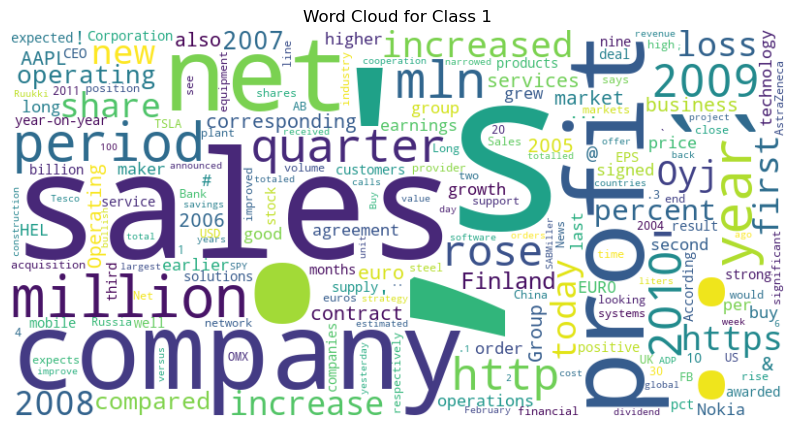

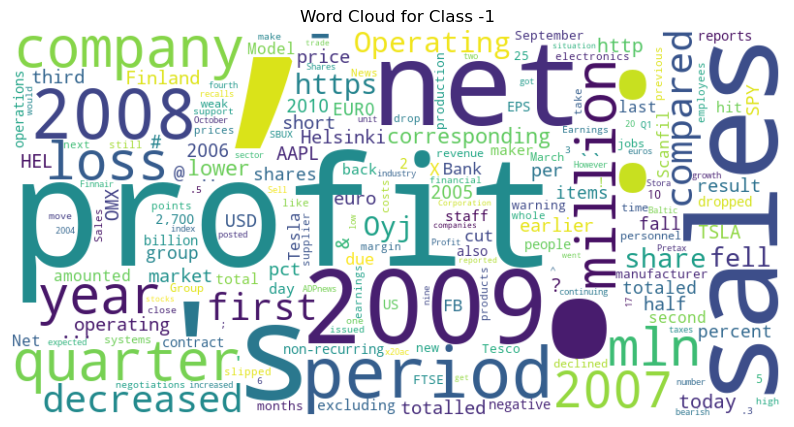

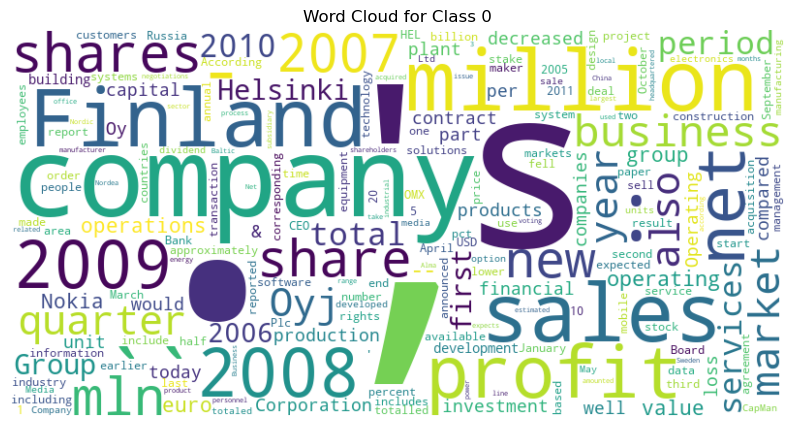

In [115]:
for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

After dropping unnecessary words, such as stopwords, we can clearly see that we have much more words that have positive financial sentiment in class 1 such as "Increased","Rose","Rise" while in class 0 there are more words that has negative sentiment like "Decreased","Negative,,"Fall".

# Splitting the dataset

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

<4673x9960 sparse matrix of type '<class 'numpy.float64'>'
	with 53521 stored elements in Compressed Sparse Row format>